In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error, auc, roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [53]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [54]:
train.drop('Id', inplace = True, axis=1)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
test_id=test['Id']
test.drop('Id', inplace = True, axis=1)
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [34]:
np.sum(pd.isnull(train))

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [35]:
np.sum(pd.isnull(test))

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [62]:
for i in train.columns:
    if train[i].isnull().sum().any():
        print(i, end = '\t')
        print(round(train[i].isnull().sum() / len(train)*100, 2))

LotFrontage	17.74
Alley	93.77
MasVnrType	0.55
MasVnrArea	0.55
BsmtQual	2.53
BsmtCond	2.53
BsmtExposure	2.6
BsmtFinType1	2.53
BsmtFinType2	2.6
Electrical	0.07
FireplaceQu	47.26
GarageType	5.55
GarageYrBlt	5.55
GarageFinish	5.55
GarageQual	5.55
GarageCond	5.55
PoolQC	99.52
Fence	80.75
MiscFeature	96.3


In [63]:
train.isnull().sum().any()

True

In [64]:
for i in test.columns:
    if test[i].isnull().sum().any():
        print(i, end = '\t')
        print(round(test[i].isnull().sum() / len(test)*100, 2))

In [65]:
test.isnull().sum().any()

False

In [66]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['Alley'] = train['Alley'].fillna(train['Alley'].mode()[0])
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())
train['BsmtQual'] = train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['BsmtCond'] = train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtExposure'] = train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train['FireplaceQu'] = train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
train['GarageType'] = train['GarageType'].fillna(train['GarageType'].mode()[0])
train['GarageYrBlt'] = train['GarageYrBlt'].ffill()
train['GarageFinish'] = train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual'] = train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond'] = train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train['PoolQC'] = train['PoolQC'].fillna(train['PoolQC'].mode()[0])
train['Fence'] = train['Fence'].fillna(train['Fence'].mode()[0])
train['MiscFeature'] = train['MiscFeature'].fillna(train['MiscFeature'].mode()[0])

In [68]:
test ['LotFrontage'] = test ['LotFrontage'].fillna( test ['LotFrontage'].mean()) 
test ['Alley'] = test ['Alley'].fillna( test ['Alley'].mode()[0]) 
test ['MasVnrType'] = test ['MasVnrType'].fillna( test ['MasVnrType'].mode()[0]) 
test ['MasVnrArea'] = test ['MasVnrArea'].fillna( test ['MasVnrArea'].mean()) 
test ['BsmtQual'] = test ['BsmtQual'].fillna(test['BsmtQual'].mode()[0]) 
test ['BsmtCond'] = test ['BsmtCond'].fillna( test ['BsmtCond'].mode()[0]) 
test ['BsmtExposure'] = test ['BsmtExposure'].fillna( test ['BsmtExposure'].mode()[0]) 
test ['BsmtFinType1'] = test ['BsmtFinType1'].fillna( test ['BsmtFinType1'].mode()[0]) 
test ['BsmtFinType2'] = test ['BsmtFinType2'].fillna( test ['BsmtFinType2'].mode()[0]) 
test ['Electrical'] = test ['Electrical'].fillna( test ['Electrical'].mode()[0]) 
test ['FireplaceQu'] = test ['FireplaceQu'].fillna( test ['FireplaceQu'].mode()[0]) 
test ['GarageType'] = test ['GarageType'].fillna( test ['GarageType'].mode()[0]) 
test ['GarageYrBlt'] = test ['GarageYrBlt'].ffill() 
test ['GarageFinish'] = test ['GarageFinish'].fillna( test ['GarageFinish'].mode()[0]) 
test ['GarageQual'] = test ['GarageQual'].fillna( test ['GarageQual'].mode()[0]) 
test ['GarageCond'] = test ['GarageCond'].fillna( test ['GarageCond'].mode()[0]) 
test ['PoolQC'] = test ['PoolQC'].fillna( test ['PoolQC'].mode()[0]) 
test ['Fence'] = test ['Fence'].fillna( test ['Fence'].mode()[0]) 
test ['MiscFeature'] = test ['MiscFeature'].fillna( test ['MiscFeature'].mode()[0])

In [70]:
for i in train.columns:
    if train[i].isnull().sum().any():
        print(i, end = '\t')
        print(round(train[i].isnull().sum() / len(train)*100, 2))

In [71]:
for i in test.columns:
    if test[i].isnull().sum().any():
        test[i] = test[i].fillna(test[i].mode()[0])

In [72]:
for i in test.columns:
    if test[i].isnull().sum().any():
        print(i, end = '\t')
        print(round(test[i].isnull().sum() / len(test)*100, 2))

In [73]:
train.isnull().sum().any()

False

In [74]:
test.isnull().sum().any()

False

In [75]:
train[train.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [76]:
test[test.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [79]:
la = LabelEncoder()
for i in train.columns:
    if train[i].dtype == 'object':
        train[i] = la.fit_transform(train[i])

In [80]:
la = LabelEncoder()
for i in test.columns:
    if test[i].dtype == 'object':
        test[i] = la.fit_transform(test[i])

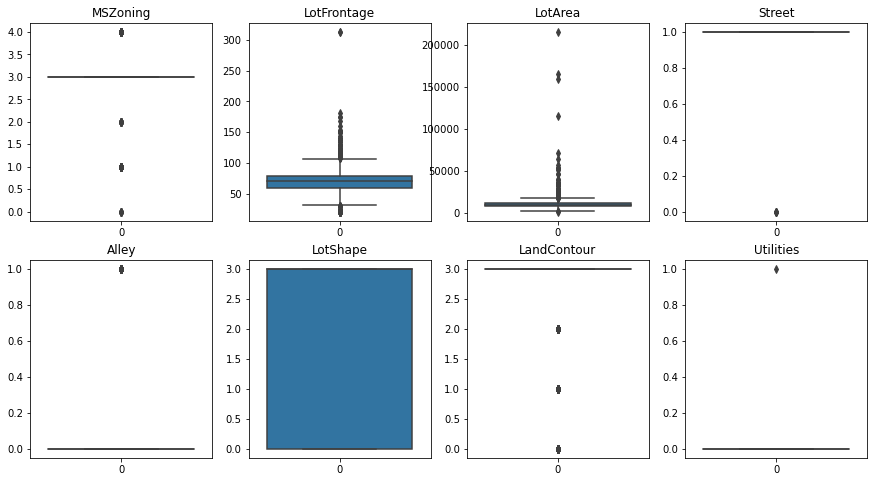

In [81]:
plt.figure(figsize = (15,8))
for i in range (1, 9):
    plt.subplot(2, 4, i)
    sns.boxplot(data = train.iloc[:, i])
    plt.title(train.columns[i])

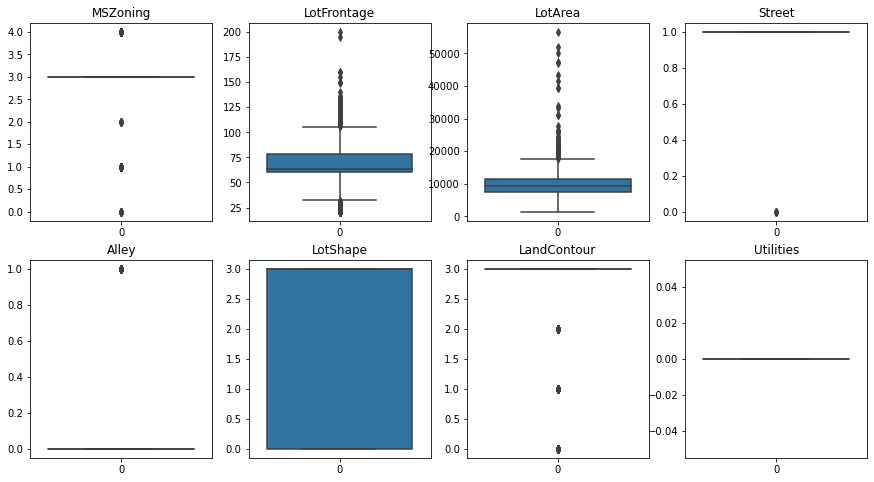

In [82]:
plt.figure(figsize = (15,8))
for i in range (1, 9):
    plt.subplot(2, 4, i)
    sns.boxplot(data = test.iloc[:, i])
    plt.title(test.columns[i])

In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   Alley          1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   int32  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   int32  
 5   Alley          1459 non-null   int32  
 6   LotShape       1459 non-null   int32  
 7   LandContour    1459 non-null   int32  
 8   Utilities      1459 non-null   int32  
 9   LotConfig      1459 non-null   int32  
 10  LandSlope      1459 non-null   int32  
 11  Neighborhood   1459 non-null   int32  
 12  Condition1     1459 non-null   int32  
 13  Condition2     1459 non-null   int32  
 14  BldgType       1459 non-null   int32  
 15  HouseStyle     1459 non-null   int32  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [91]:
data = pd.concat([train, test], ignore_index=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,0,3,3,0,4,...,0,2,2,2,0,2,2008,8,4,208500.0
1,20,3,80.0,9600,1,0,3,3,0,2,...,0,2,2,2,0,5,2007,8,4,181500.0
2,60,3,68.0,11250,1,0,0,3,0,4,...,0,2,2,2,0,9,2008,8,4,223500.0
3,70,3,60.0,9550,1,0,0,3,0,0,...,0,2,2,2,0,2,2006,8,0,140000.0
4,60,3,84.0,14260,1,0,0,3,0,2,...,0,2,2,2,0,12,2008,8,4,250000.0


In [95]:
np.sum(pd.isnull(data))

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

In [99]:
x = train.iloc[:, :-1]
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,0,3,3,0,4,...,0,0,2,2,2,0,2,2008,8,4
1,20,3,80.0,9600,1,0,3,3,0,2,...,0,0,2,2,2,0,5,2007,8,4
2,60,3,68.0,11250,1,0,0,3,0,4,...,0,0,2,2,2,0,9,2008,8,4
3,70,3,60.0,9550,1,0,0,3,0,0,...,0,0,2,2,2,0,2,2006,8,0
4,60,3,84.0,14260,1,0,0,3,0,2,...,0,0,2,2,2,0,12,2008,8,4


In [100]:
y = train.loc[:, 'SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [103]:
std = StandardScaler()
col = x.columns
x = std.fit_transform(x)
x = pd.DataFrame(data = x, columns = col)
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.073375,-0.045532,-0.229372,-0.207142,0.064238,-0.169981,0.750731,0.314667,-0.02618,0.604670,...,-0.270208,-0.068692,0.049718,0.250362,0.039485,-0.087688,-1.599111,0.138777,0.313867,0.208502
1,-0.872563,-0.045532,0.451936,-0.091886,0.064238,-0.169981,0.750731,0.314667,-0.02618,-0.628316,...,-0.270208,-0.068692,0.049718,0.250362,0.039485,-0.087688,-0.489110,-0.614439,0.313867,0.208502
2,0.073375,-0.045532,-0.093110,0.073480,0.064238,-0.169981,-1.378933,0.314667,-0.02618,0.604670,...,-0.270208,-0.068692,0.049718,0.250362,0.039485,-0.087688,0.990891,0.138777,0.313867,0.208502
3,0.309859,-0.045532,-0.456474,-0.096897,0.064238,-0.169981,-1.378933,0.314667,-0.02618,-1.861302,...,-0.270208,-0.068692,0.049718,0.250362,0.039485,-0.087688,-1.599111,-1.367655,0.313867,-3.426284
4,0.073375,-0.045532,0.633618,0.375148,0.064238,-0.169981,-1.378933,0.314667,-0.02618,-0.628316,...,-0.270208,-0.068692,0.049718,0.250362,0.039485,-0.087688,2.100892,0.138777,0.313867,0.208502


In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [111]:
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)
Y_rpred = RF.predict(X_test)

r_accuracy = accuracy_score(Y_test, Y_rpred)
print('Accuracy: %f' % r_accuracy)
r_precision = metrics.precision_score(Y_test, Y_rpred, average='weighted', labels=np.unique(Y_rpred))
print('Precision: %f' % r_precision)
r_recall = metrics.recall_score(Y_test, Y_rpred, average='weighted', labels=np.unique(Y_rpred))
print('Recall: %f' % r_recall)
r_f1 = metrics.f1_score(Y_test, Y_rpred, average='weighted', labels=np.unique(Y_rpred))
print('F1 score: %f' % r_f1)
r_score = mean_absolute_error(Y_test, Y_rpred)
print('Mean Absolute Error: %f' % r_score)

Accuracy: 0.008219
Precision: 0.015213
Recall: 0.020134
F1 score: 0.017114
Mean Absolute Error: 25711.065753


In [112]:
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train,Y_train)
Y_dpred = Dtree.predict(X_test)

d_accuracy = accuracy_score(Y_test, Y_dpred)
print('Accuracy: %f' % d_accuracy)
d_precision = metrics.precision_score(Y_test, Y_dpred, average='weighted', labels=np.unique(Y_dpred))
print('Precision: %f' % d_precision)
d_recall = metrics.recall_score(Y_test, Y_dpred, average='weighted', labels=np.unique(Y_dpred))
print('Recall: %f' % d_recall)
d_f1 = metrics.f1_score(Y_test, Y_dpred, average='weighted', labels=np.unique(Y_dpred))
print('F1 score: %f' % d_f1)
d_score = mean_absolute_error(Y_test, Y_dpred)
print('Mean Absolute Error: %f' % d_score)

Accuracy: 0.005479
Precision: 0.014815
Recall: 0.014815
F1 score: 0.014392
Mean Absolute Error: 32969.093151


In [113]:
GausNB = GaussianNB()
GausNB.fit(X_train,Y_train)
Y_gpred = GausNB.predict(X_test)

g_accuracy = accuracy_score(Y_test, Y_gpred)
print('Accuracy: %f' % g_accuracy)
g_precision = metrics.precision_score(Y_test, Y_gpred, average='weighted', labels=np.unique(Y_gpred))
print('Precision: %f' % g_precision)
g_recall = metrics.recall_score(Y_test, Y_gpred, average='weighted', labels=np.unique(Y_gpred))
print('Recall: %f' % g_recall)
g_f1 = metrics.f1_score(Y_test, Y_gpred, average='weighted', labels=np.unique(Y_gpred))
print('F1 score: %f' % g_f1)
g_score = mean_absolute_error(Y_test, Y_gpred)
print('Mean Absolute Error: %f' % g_score)

Accuracy: 0.013699
Precision: 0.045707
Recall: 0.036496
F1 score: 0.035766
Mean Absolute Error: 40626.213699


In [114]:
x_test = test.loc[:, :]
col = x_test.columns
x_test = std.transform(x_test)
x_test = pd.DataFrame(data = x_test, columns = col)
x_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.872563,-1.628309,0.451936,0.110763,0.064238,-0.169981,0.750731,0.314667,-0.02618,0.604670,...,1.882709,-0.068692,-24.146223,0.250362,0.039485,-0.087688,-0.119110,1.64521,0.313867,0.208502
1,-0.872563,-0.045532,0.497357,0.375850,0.064238,-0.169981,-1.378933,0.314667,-0.02618,-1.861302,...,-0.270208,-0.068692,-24.146223,0.250362,-23.019934,25.116309,-0.119110,1.64521,0.313867,0.208502
2,0.073375,-0.045532,0.179413,0.332053,0.064238,-0.169981,-1.378933,0.314667,-0.02618,0.604670,...,-0.270208,-0.068692,-24.146223,0.250362,0.039485,-0.087688,-1.229111,1.64521,0.313867,0.208502
3,0.073375,-0.045532,0.361095,-0.054002,0.064238,-0.169981,-1.378933,0.314667,-0.02618,0.604670,...,-0.270208,-0.068692,-24.146223,0.250362,0.039485,-0.087688,-0.119110,1.64521,0.313867,0.208502
4,1.492282,-0.045532,-1.228623,-0.552407,0.064238,-0.169981,-1.378933,-2.512494,-0.02618,0.604670,...,2.313293,-0.068692,-24.146223,0.250362,0.039485,-0.087688,-1.969111,1.64521,0.313867,0.208502


In [115]:
predicted = RF.predict(x_test)
predicted

array([ 72500, 164900, 192000, ..., 235000, 126000, 250000], dtype=int64)

In [116]:
submit = pd.DataFrame(data = {'Id' : test_id, 'SalePrice' :predicted})
submit

,Id,SalePrice
0,1461,72500
1,1462,164900
2,1463,192000
3,1464,200500
4,1465,189000
...,...,...
1454,2915,106000
1455,2916,88000
1456,2917,235000
1457,2918,126000


In [117]:
submit.to_csv("submission1.csv", index = False)
submit.head()

,Id,SalePrice
0,1461,72500
1,1462,164900
2,1463,192000
3,1464,200500
4,1465,189000
